In [12]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [14]:
df = pd.read_csv('US_Accidents_March23.csv') 

In [15]:
print("Dataset shape:", df.shape)
print(df.info())
df.head()

Dataset shape: (7728394, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          fl

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [16]:
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Start_Time'])

In [17]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')


In [18]:
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()
df['Year'] = df['Start_Time'].dt.year


C:\Users\Samarth Sharma\AppData\Local\Temp\ipykernel_47156\4227109942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='crest')


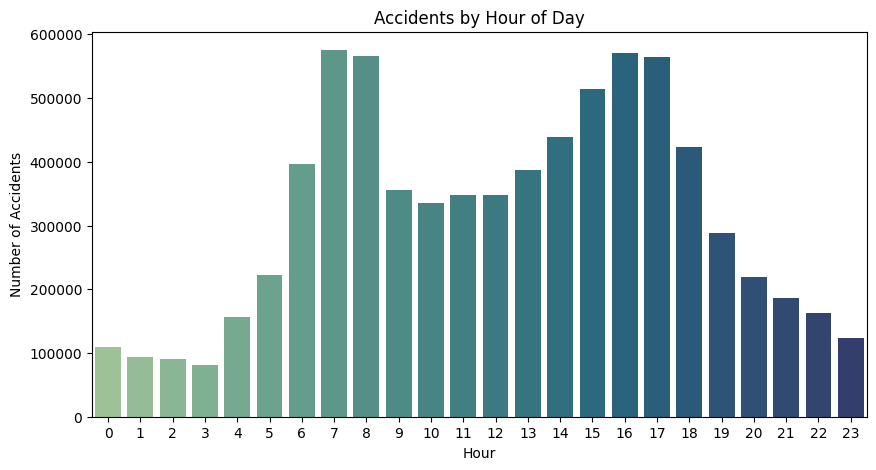

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='crest')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

C:\Users\Samarth Sharma\AppData\Local\Temp\ipykernel_47156\815669199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.index, y=top_weather.values, palette='viridis')


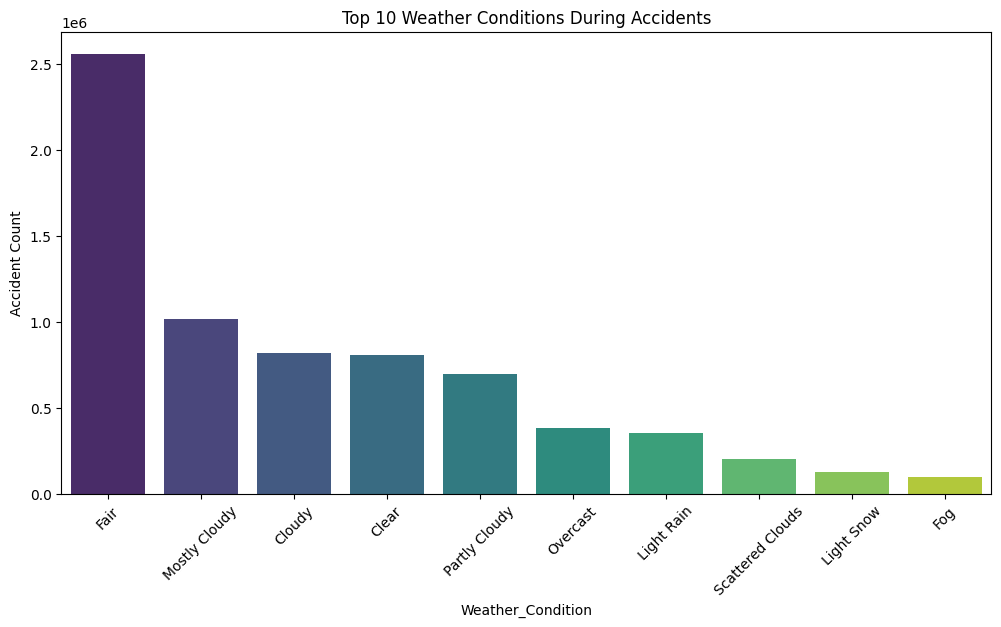

In [20]:
plt.figure(figsize=(12, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.index, y=top_weather.values, palette='viridis')
plt.title('Top 10 Weather Conditions During Accidents')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Samarth Sharma\AppData\Local\Temp\ipykernel_47156\4235807458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')


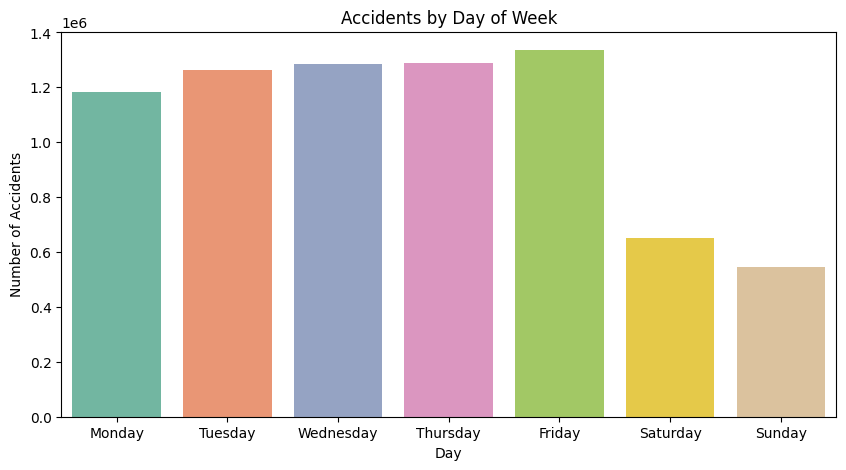

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')
plt.title('Accidents by Day of Week')
plt.ylabel('Number of Accidents')
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.show()

In [23]:
ca_df = df[df['State'] == 'CA']


In [24]:
map_ca = folium.Map(location=[ca_df['Start_Lat'].mean(), ca_df['Start_Lng'].mean()], zoom_start=6)

In [25]:
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in ca_df.iterrows()]
HeatMap(heat_data[:5000]).add_to(map_ca) 

In [26]:
map_ca.save('CA_Accident_Heatmap.html')

C:\Users\Samarth Sharma\AppData\Local\Temp\ipykernel_47156\725442705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_weather.index, y=severity_weather.values, palette='magma')


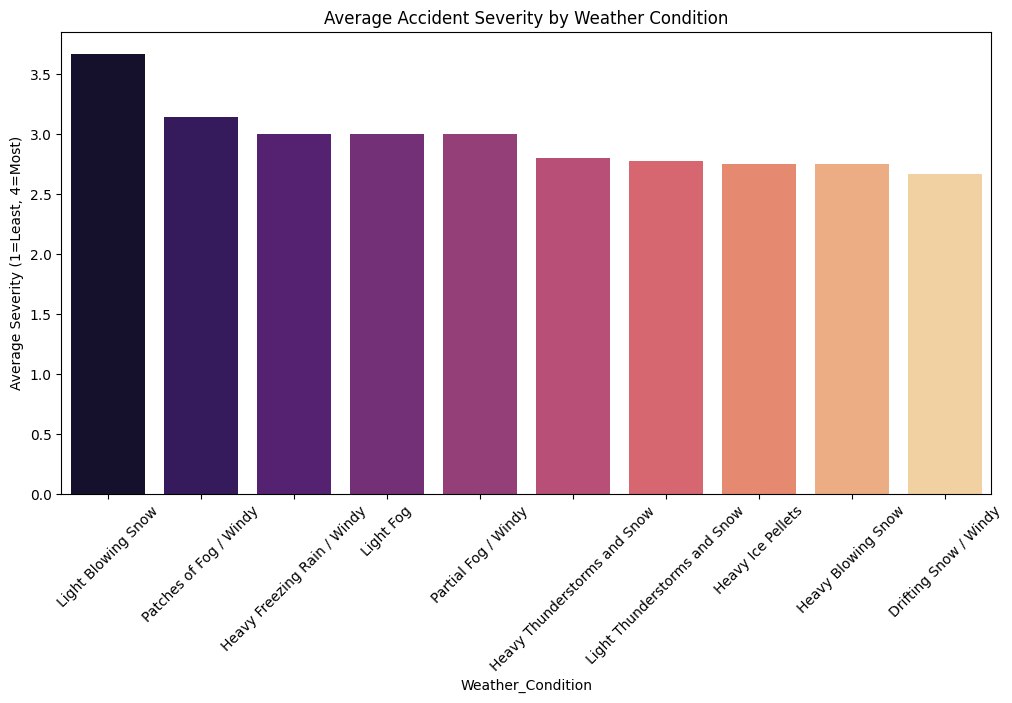

In [27]:
plt.figure(figsize=(12, 6))
severity_weather = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=severity_weather.index, y=severity_weather.values, palette='magma')
plt.title('Average Accident Severity by Weather Condition')
plt.ylabel('Average Severity (1=Least, 4=Most)')
plt.xticks(rotation=45)
plt.show()